# Predicting Car Price

In this project, we'll practice the machine learning workflow to predict a car's market price using its attribute.

## 1. Intruduction to the data set
The data set contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data',names = cols)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 2. Data Cleaning

* Extract all the numerical columns to a new dataframe.
* Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
* After replacing the ? values, use either the DataFrame.astype() convert column types.
* Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
  * Replace the missing values using the average values from that column.
  * Drop the rows entirely (especially if other columns in those rows have missing values).
  * Drop the column entirely.
* Explore the missing value counts for the other numeric columns and handle any missing values.
* Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [3]:
# converted columns to numeric types. 
num_cols = ['symboling', 'normalized-losses',  'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[num_cols ]
num_cars = num_cars.replace("?", np.nan)
num_cars = num_cars.astype(float)
num_cars.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [4]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-rate   205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  price              201 non-null    float64
dtypes: float64(16)
memory usag

In [5]:
num_cars.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# remove all rows iwith missing value of 'price'
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Normalize all columnns to range from 0 to 1 except the target column.
price = num_cars['price']

num_cars = (num_cars - num_cars.mean()) /(num_cars.max()-num_cars.mean())
num_cars['price'] = price
num_cars.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.0,-0.461341,-0.159326,-0.292762,-0.823204,-0.005076,0.015691,0.22861,-0.63181,-0.090706,0.047937,-0.079322,-0.175439,-0.158131,13495.0
1,1.0,0.0,-0.461341,-0.159326,-0.292762,-0.823204,-0.005076,0.015691,0.22861,-0.63181,-0.090706,0.047937,-0.079322,-0.175439,-0.158131,16500.0


## 3. Univariate Model

Let's start with some univariate k-nearest neighbors models before moving to more complex models

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col,df):
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))
    
    half_rows = int(len(rand_df)/2)
    trian = rand_df[0:half_rows]
    test =  rand_df[half_rows:]
    
    knn = KNeighborsRegressor()

    knn.fit(trian[[train_col]], trian[target_col])
    predictions = knn.predict(test[[train_col]])

    mse = mean_squared_error(test[target_col], predictions)
    rmse = (mse ** 0.5)
        
    return rmse  

In [10]:
# Calculate the RMSE and return that value.
train_cols = num_cars.columns.drop('price')

rmse_result ={}
for train_col in train_cols:
     rmse_result[train_col] = knn_train_test (train_col,'price',num_cars)
        
rmse_result_series = pd.Series(rmse_result)
rmse_result_series.sort_values()

engine-size          3245.224717
horsepower           4046.232709
curb-weight          4445.141920
highway-mpg          4686.561001
city-mpg             4876.700372
width                4918.400426
length               5427.200961
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6795.802855
normalized-losses    7353.056978
peak-rpm             7644.033947
stroke               7922.009228
symboling            7979.434920
height               8073.119759
dtype: float64

In [11]:
# Modify the knn_train_test() function you wrote to accept a parameter for the k value.
def knn_train_test( train_col, target_col, df,k_lst):
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))
    
    half_rows = int(len(rand_df)/2)
    trian = rand_df[0:half_rows]
    test =  rand_df[half_rows:]
    
    k_rmses  = {}
    for k in k_lst:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(trian[[train_col]],trian[target_col])
        predictions = knn.predict(test[[train_col]])
        mse = mean_squared_error(test[target_col], predictions)
        k_rmses [k]=  mse ** 0.5
    return k_rmses   

In [12]:
# For each numeric column, create, train, and test a univariate model
# using the following k values (1, 3, 5, 7, and 9). 
k_lst = [1,3,5,7,9]
rmse_result ={}

for col in train_cols:
     rmse_result[col] = knn_train_test (col,'price', num_cars, k_lst)
rmse_result

{'symboling': {1: 8420.026461589143,
  3: 8736.916665985938,
  5: 7979.434919842381,
  7: 7884.532513187155,
  9: 7817.760486088469},
 'normalized-losses': {1: 7836.7752643899685,
  3: 7501.766502195689,
  5: 7353.056977667974,
  7: 7693.883459989381,
  9: 7609.457151551812},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.490335934409,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4611.990241761035,
  3: 5134.162855268855,
  5: 5427.2009608367125,
  7: 5309.592453572586,
  9: 5425.475217224954},
 'width': {1: 4559.257297950061,
  3: 4648.142449519281,
  5: 4918.400425679749,
  7: 4786.8890588132645,
  9: 4732.902349230716},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7719.6388768234065,
  9: 7872.385681718157},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.087333836378,
  9: 4632.497106001295},
 'engine-size': {1: 3227.659787364569,
  3: 2920.1026311

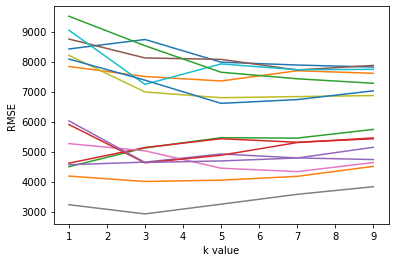

In [13]:
# Visualize the results using a line plot.
import matplotlib.pyplot as plt
%matplotlib inline
for feature in rmse_result:
    rmse = rmse_result[feature]
    x = list(rmse.keys())
    y = list(rmse.values())
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## 4. Multivariate Model

In [14]:
# Compute average RMSE for each feature.
avg_rmse ={}
for feature in rmse_result:
    rmse = rmse_result[feature]
    avg_rmse[feature] =np.mean((list(rmse.values())))
sorted_avg_rmse =pd.Series(avg_rmse).sort_values()
print(sorted_avg_rmse)
top_cols = list(sorted_avg_rmse.index)
top_cols

engine-size          3358.724987
horsepower           4181.595974
width                4729.118316
curb-weight          4738.866921
highway-mpg          5054.765345
length               5181.684346
city-mpg             5230.951074
wheel-base           5252.436179
bore                 7137.542790
compression-rate     7165.156655
normalized-losses    7598.987871
stroke               7934.970693
peak-rpm             8077.555760
height               8107.493886
symboling            8167.734209
dtype: float64


['engine-size',
 'horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'bore',
 'compression-rate',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height',
 'symboling']

In [15]:
def knn_train_test( train_cols, target_col, df, k_values):
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))
    
    half_rows = int(len(rand_df)/2)
    trian = rand_df[0:half_rows]
    test =  rand_df[half_rows:]
    
    k_rmses  = {}

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(trian[train_cols],trian[target_col])
        predictions = knn.predict(test[train_cols])
        mse = mean_squared_error(test[target_col], predictions)
        k_rmses [k]=  mse ** 0.5
    return k_rmses   

rmse_result = {}
for num in range(2,6):
    train_cols = top_cols[0:num]
    key = "best " + str(num) + " features:"
    rmse_result[key] = knn_train_test (train_cols,'price', num_cars,[5])

rmse_result    

{'best 2 features:': {5: 2897.1026517287},
 'best 3 features:': {5: 3620.823650130801},
 'best 4 features:': {5: 3456.4521351200915},
 'best 5 features:': {5: 3463.12135273403}}

## 5. Hyperparameter Tuning

In [16]:
hyperparameter =[x for x in range(1,25)]
rmse_result = {}

for num in range(2,6):
    train_cols = top_cols[0:num]
    key = "best " + str(num) + " features:"
    rmse_result[key] = knn_train_test (train_cols,'price', num_cars, hyperparameter)

rmse_result 

{'best 2 features:': {1: 2924.619293156118,
  2: 2745.2834021136673,
  3: 2771.6036701322264,
  4: 2716.260843681225,
  5: 2897.1026517287,
  6: 3081.634445977631,
  7: 3156.8463476704987,
  8: 3437.7145374996794,
  9: 3812.0580036670913,
  10: 4052.4561055275753,
  11: 4159.307426756584,
  12: 4288.237807211619,
  13: 4367.663212528511,
  14: 4409.944772167148,
  15: 4529.600773379992,
  16: 4672.893319480718,
  17: 4750.802850315589,
  18: 4813.303275393554,
  19: 4851.321976256463,
  20: 4836.507927070302,
  21: 4817.464828239102,
  22: 4827.160457066548,
  23: 4849.073755859744,
  24: 4883.335437655834},
 'best 3 features:': {1: 3333.205450352172,
  2: 3466.55777885764,
  3: 3323.4411366833165,
  4: 3357.3485622129065,
  5: 3620.823650130801,
  6: 3791.4905210961765,
  7: 3924.296451585591,
  8: 3941.4202922124227,
  9: 4037.6941350084558,
  10: 4037.0303957289702,
  11: 4124.281242376916,
  12: 4163.844196836717,
  13: 4246.626228339095,
  14: 4381.339245096452,
  15: 4416.3213622

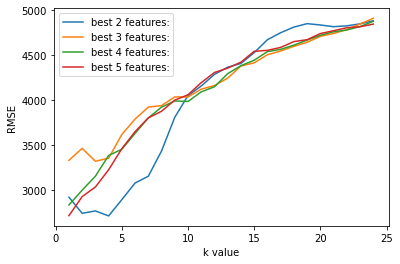

In [17]:
for key,feature in rmse_result.items():
    x = list(feature.keys())
    y = list(feature.values())
    plt.plot(x, y, label ="{}".format(key))

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper left')    